In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import to_datetime
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:
df=pd.read_csv('KUfacility_register_data_for_uploadWAISWAetalPLOSONE82020.csv')

In [3]:
df.shape

(61018, 22)

In [4]:
df.head()

,id,country,facility_coded,referral_in,apgar_1,apgar_5,sex,baby_discharge_status,multiple,bba,...,record_type,mothers_age_cat,c_mother_status,c_cat_ga,c_cat_bw,c_mode_of_delivery,quarter,c_baby_status,c_birth_outcome,c_birth_weight_g2
0,162230,2,HF0004,1,7.0,9.0,Male,NaN,1.0,0,...,Birth,≤19,Discharged_Alive,28-30wks,1000-1499g,Vaginal_Delivery,Q1,Undocumented_LB,Born_Alive,1400.0
1,127964,2,HF0005,NaN,NaN,NaN,NaN,NaN,1.0,0,...,Discharge_Preg,≤19,Discharged_Alive,NaN,NaN,NaN,Q2,Undocumented_LB,Born_Alive,NaN
2,148113,2,HF0006,0,NaN,NaN,NaN,NaN,1.0,0,...,Discharge_Preg,≤19,Discharged_Alive,NaN,NaN,NaN,Q4,Undocumented_LB,Born_Alive,NaN
3,95858,1,HF014,NaN,10.0,10.0,Male,Alive,NaN,0,...,Birth,≤19,Alive,37wks+,3000-3499g,Vaginal_Delivery,Q4,Live_Baby,Born_Alive,3000.0
4,206414,1,HF007,NaN,9.0,10.0,Male,Alive,1.0,0,...,Birth,≤19,alive,37wks+,2500-2999g,Vaginal_Delivery,Q1,Live_Baby,Born_Alive,2800.0


In [5]:
df.columns

Index(['id', 'country', 'facility_coded', 'referral_in', 'apgar_1', 'apgar_5',
       'sex', 'baby_discharge_status', 'multiple', 'bba', 'doc_abortion',
       'doc_iufd', 'record_type', 'mothers_age_cat', 'c_mother_status',
       'c_cat_ga', 'c_cat_bw', 'c_mode_of_delivery', 'quarter',
       'c_baby_status', 'c_birth_outcome', 'c_birth_weight_g2'],
      dtype='object')

# Taking columns that are important for prediction

In [6]:
df_new= df[['country', 'facility_coded', 'referral_in','sex','multiple','bba', 'doc_abortion', 'doc_iufd','mothers_age_cat',
          'c_cat_ga','c_cat_bw','c_birth_outcome','c_birth_weight_g2']]

# What Each column Represents:

country: This column indicates the country where the data was collected. Each entry corresponds to the country code or name where the pregnant woman resides or where the medical data was recorded.

facility_coded: This column likely contains a coded value representing the healthcare facility where the woman received care. These codes could correspond to specific hospitals, clinics, or other healthcare providers.

referral_in: This column indicates whether the pregnant woman was referred to the healthcare facility from another location or healthcare provider. It typically has binary values (e.g., Yes/No or 0/1).

sex: This column represents the sex of the baby. It usually contains values such as 'Male', 'Female', or could be coded numerically (e.g., 1 for Male, 2 for Female).

multiple: This column indicates whether the pregnancy involved multiple births (e.g., twins, triplets). It could have values like 'Yes', 'No', or be coded numerically (e.g., 1 for Yes, 0 for No).

bba: This stands for "Born Before Arrival," indicating whether the baby was born before the mother arrived at the healthcare facility. It is typically a binary column (Yes/No or 0/1).

doc_abortion: This column records whether the pregnancy ended in a documented abortion. This could be a binary value indicating Yes/No or 0/1.

doc_iufd: This stands for "Documented Intrauterine Fetal Death," indicating whether there was a confirmed fetal death in utero. It is also likely to be a binary column (Yes/No or 0/1).

mothers_age_cat: This column categorizes the mother's age into predefined categories. Categories might include ranges such as 'Under 20', '20-24', '25-29', etc.

c_cat_ga: This likely stands for "Categorical Gestational Age," categorizing the gestational age of the fetus at birth. Categories might include 'Preterm', 'Term', 'Post-term', or specific ranges of weeks.

c_cat_bw: This likely stands for "Categorical Birth Weight," categorizing the birth weight of the baby. Categories might include 'Low Birth Weight', 'Normal Birth Weight', 'High Birth Weight', or specific weight ranges.

c_birth_outcome: This column records the outcome of the birth. Possible values might include 'Live Birth', 'Stillbirth', 'Neonatal Death', etc.

c_birth_weight_g2: This column likely contains the exact birth weight of the baby in grams. It provides a more precise measure compared to the categorical birth weight column.

Each column in your dataset provides specific and potentially critical information that can be used for a variety of analyses, including healthcare outcomes, demographic studies, and understanding trends in maternal and child health.

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61018 entries, 0 to 61017
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            61018 non-null  int64  
 1   facility_coded     61018 non-null  object 
 2   referral_in        36636 non-null  object 
 3   sex                47357 non-null  object 
 4   multiple           59472 non-null  float64
 5   bba                61018 non-null  int64  
 6   doc_abortion       61018 non-null  int64  
 7   doc_iufd           670 non-null    float64
 8   mothers_age_cat    61018 non-null  object 
 9   c_cat_ga           49974 non-null  object 
 10  c_cat_bw           47194 non-null  object 
 11  c_birth_outcome    61018 non-null  object 
 12  c_birth_weight_g2  47194 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 6.1+ MB


In [8]:
df_new.describe()

,country,multiple,bba,doc_abortion,doc_iufd,c_birth_weight_g2
count,61018.000000,59472.000000,61018.000000,61018.000000,670.0,47194.000000
mean,1.692369,1.035378,0.009931,0.042102,1.0,3098.569733
std,0.461516,0.190383,0.099162,0.200824,0.0,690.806056
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.0,2800.000000
50%,2.000000,1.000000,0.000000,0.000000,1.0,3100.000000
75%,2.000000,1.000000,0.000000,0.000000,1.0,3500.000000
max,2.000000,3.000000,1.000000,1.000000,1.0,38800.000000


In [9]:
df_new['c_birth_outcome'].value_counts()

c_birth_outcome
Born_Alive     56588
Still_Birth     4430
Name: count, dtype: int64

In [10]:
df_new.c_birth_outcome.value_counts() / len(df_new) * 100

c_birth_outcome
Born_Alive     92.739847
Still_Birth     7.260153
Name: count, dtype: float64

In [11]:
df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2
0,2,HF0004,1,Male,1.0,0,0,NaN,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,NaN,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
2,2,HF0006,0,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
3,1,HF014,NaN,Male,NaN,0,0,NaN,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,NaN,Male,1.0,0,0,NaN,≤19,37wks+,2500-2999g,Born_Alive,2800.0


In [12]:
df_new.tail()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2
61013,1,HF023,NaN,Female,1.0,0,0,NaN,missing,37wks+,3000-3499g,Born_Alive,3000.0
61014,1,HF023,NaN,Male,1.0,0,0,NaN,missing,34-36wks,3000-3499g,Born_Alive,3100.0
61015,1,HF023,NaN,Female,1.0,0,0,NaN,missing,37wks+,3500g+,Born_Alive,3600.0
61016,1,HF023,NaN,NaN,1.0,0,0,NaN,missing,NaN,NaN,Born_Alive,NaN
61017,1,HF023,NaN,Male,1.0,0,0,NaN,missing,37wks+,3000-3499g,Born_Alive,3000.0


# Handiling missing values

In [13]:
df_new.isnull().mean().sort_values(ascending=True)*100

country               0.000000
facility_coded        0.000000
bba                   0.000000
doc_abortion          0.000000
mothers_age_cat       0.000000
c_birth_outcome       0.000000
multiple              2.533679
c_cat_ga             18.099577
sex                  22.388476
c_cat_bw             22.655610
c_birth_weight_g2    22.655610
referral_in          39.958701
doc_iufd             98.901963
dtype: float64

In [14]:
df_new.shape

(61018, 13)

In [15]:
df_new.drop_duplicates()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2
0,2,HF0004,1,Male,1.0,0,0,NaN,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,NaN,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
2,2,HF0006,0,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
3,1,HF014,NaN,Male,NaN,0,0,NaN,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,NaN,Male,1.0,0,0,NaN,≤19,37wks+,2500-2999g,Born_Alive,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61013,1,HF023,NaN,Female,1.0,0,0,NaN,missing,37wks+,3000-3499g,Born_Alive,3000.0
61014,1,HF023,NaN,Male,1.0,0,0,NaN,missing,34-36wks,3000-3499g,Born_Alive,3100.0
61015,1,HF023,NaN,Female,1.0,0,0,NaN,missing,37wks+,3500g+,Born_Alive,3600.0
61016,1,HF023,NaN,NaN,1.0,0,0,NaN,missing,NaN,NaN,Born_Alive,NaN


In [16]:
df_new['doc_iufd'].value_counts()

doc_iufd
1.0    670
Name: count, dtype: int64

In [17]:
df_new['doc_iufd'] = np.where(df_new['doc_iufd'].isnull(),0,1)

In [18]:
df_new.isnull().mean().sort_values(ascending=True)*100

country               0.000000
facility_coded        0.000000
bba                   0.000000
doc_abortion          0.000000
doc_iufd              0.000000
mothers_age_cat       0.000000
c_birth_outcome       0.000000
multiple              2.533679
c_cat_ga             18.099577
sex                  22.388476
c_cat_bw             22.655610
c_birth_weight_g2    22.655610
referral_in          39.958701
dtype: float64

In [19]:
df_new.isnull().sum().sort_values(ascending=False)

referral_in          24382
c_cat_bw             13824
c_birth_weight_g2    13824
sex                  13661
c_cat_ga             11044
multiple              1546
country                  0
facility_coded           0
bba                      0
doc_abortion             0
doc_iufd                 0
mothers_age_cat          0
c_birth_outcome          0
dtype: int64

In [20]:
df_new['c_cat_bw'].value_counts()

c_cat_bw
3000-3499g    18377
3500g+        13196
2500-2999g    10653
2000-2499g     2864
1500-1999g     1256
1000-1499g      584
500-999g        215
<500g            49
Name: count, dtype: int64

In [21]:
df_new['sex'].value_counts()

sex
Male             24251
Female           22734
Not_indicated      372
Name: count, dtype: int64

In [22]:
df_new['c_cat_ga'].value_counts()

c_cat_ga
37wks+      39417
34-36wks     4954
<24wks       2086
28-30wks     1461
31-33wks     1319
24-27wks      737
Name: count, dtype: int64

In [23]:
df_new['multiple'].value_counts()

multiple
1.0    57431
2.0     1978
3.0       63
Name: count, dtype: int64

In [24]:
def replace_nan(df,feature):
    most_frequent_category=df[feature].mode()[0]
    df[feature].fillna(most_frequent_category,inplace=True)

In [25]:
for feature in ['c_cat_bw','sex','c_cat_ga','multiple']:
    replace_nan(df_new,feature)

In [26]:
df_new.isnull().sum().sort_values(ascending=False)

referral_in          24382
c_birth_weight_g2    13824
country                  0
facility_coded           0
sex                      0
multiple                 0
bba                      0
doc_abortion             0
doc_iufd                 0
mothers_age_cat          0
c_cat_ga                 0
c_cat_bw                 0
c_birth_outcome          0
dtype: int64

In [27]:
df['c_birth_weight_g2'].dropna().sample(df['c_birth_weight_g2'].isnull().sum(),random_state=0)

51635    3000.0
53168    3600.0
52240    3100.0
52084    3900.0
46324    3600.0
          ...  
50194    3000.0
30027    3400.0
6486     3000.0
13904    4000.0
15035    3100.0
Name: c_birth_weight_g2, Length: 13824, dtype: float64

In [28]:
def impute_nan(df,variable):
    df[variable+"_"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_']=random_sample

In [29]:
impute_nan(df_new,"c_birth_weight_g2")

In [30]:
df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0,1400.0
1,2,HF0005,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
3,1,HF014,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0,3000.0
4,1,HF007,NaN,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0,2800.0


In [31]:
print(df_new['c_birth_weight_g2'].std())
print(df_new['c_birth_weight_g2_'].std())

690.8060562662702
681.7995266288918


In [32]:
df_new.isnull().mean().sort_values(ascending=True)*100

country                0.000000
facility_coded         0.000000
sex                    0.000000
multiple               0.000000
bba                    0.000000
doc_abortion           0.000000
doc_iufd               0.000000
mothers_age_cat        0.000000
c_cat_ga               0.000000
c_cat_bw               0.000000
c_birth_outcome        0.000000
c_birth_weight_g2_     0.000000
c_birth_weight_g2     22.655610
referral_in           39.958701
dtype: float64

In [33]:
df_new.head(30)

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0,1400.0
1,2,HF0005,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
3,1,HF014,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0,3000.0
4,1,HF007,NaN,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0,2800.0
5,1,HF008,NaN,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,NaN,3100.0
6,2,HF0005,NaN,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,NaN,3900.0
7,2,HF0005,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
8,2,HF0005,0,Male,1.0,0,1,0,≤19,<24wks,3000-3499g,Still_Birth,NaN,2500.0
9,2,HF0006,0,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,NaN,3600.0


In [34]:
df_new['referral_in'].value_counts()

referral_in
0      32302
1       4331
yes        3
Name: count, dtype: int64

In [35]:
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),"Missing",df[variable])

In [36]:
impute_nan(df_new,'referral_in')

In [37]:
df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0,2800.0


In [38]:
colsToDrop=['c_birth_weight_g2']
df_new.drop(columns = colsToDrop, inplace = True)

In [39]:
df_new.head(100)

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,HF0004,0,Female,1.0,0,0,0,≤19,37wks+,2000-2499g,Born_Alive,2300.0
96,2,HF0004,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3200.0
97,2,HF0004,0,Female,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
98,2,HF0004,0,Male,1.0,0,0,0,≤19,28-30wks,3000-3499g,Born_Alive,3100.0


In [40]:
df_new.isnull().mean().sort_values(ascending=True)*100

country               0.0
facility_coded        0.0
referral_in           0.0
sex                   0.0
multiple              0.0
bba                   0.0
doc_abortion          0.0
doc_iufd              0.0
mothers_age_cat       0.0
c_cat_ga              0.0
c_cat_bw              0.0
c_birth_outcome       0.0
c_birth_weight_g2_    0.0
dtype: float64

<Axes: >

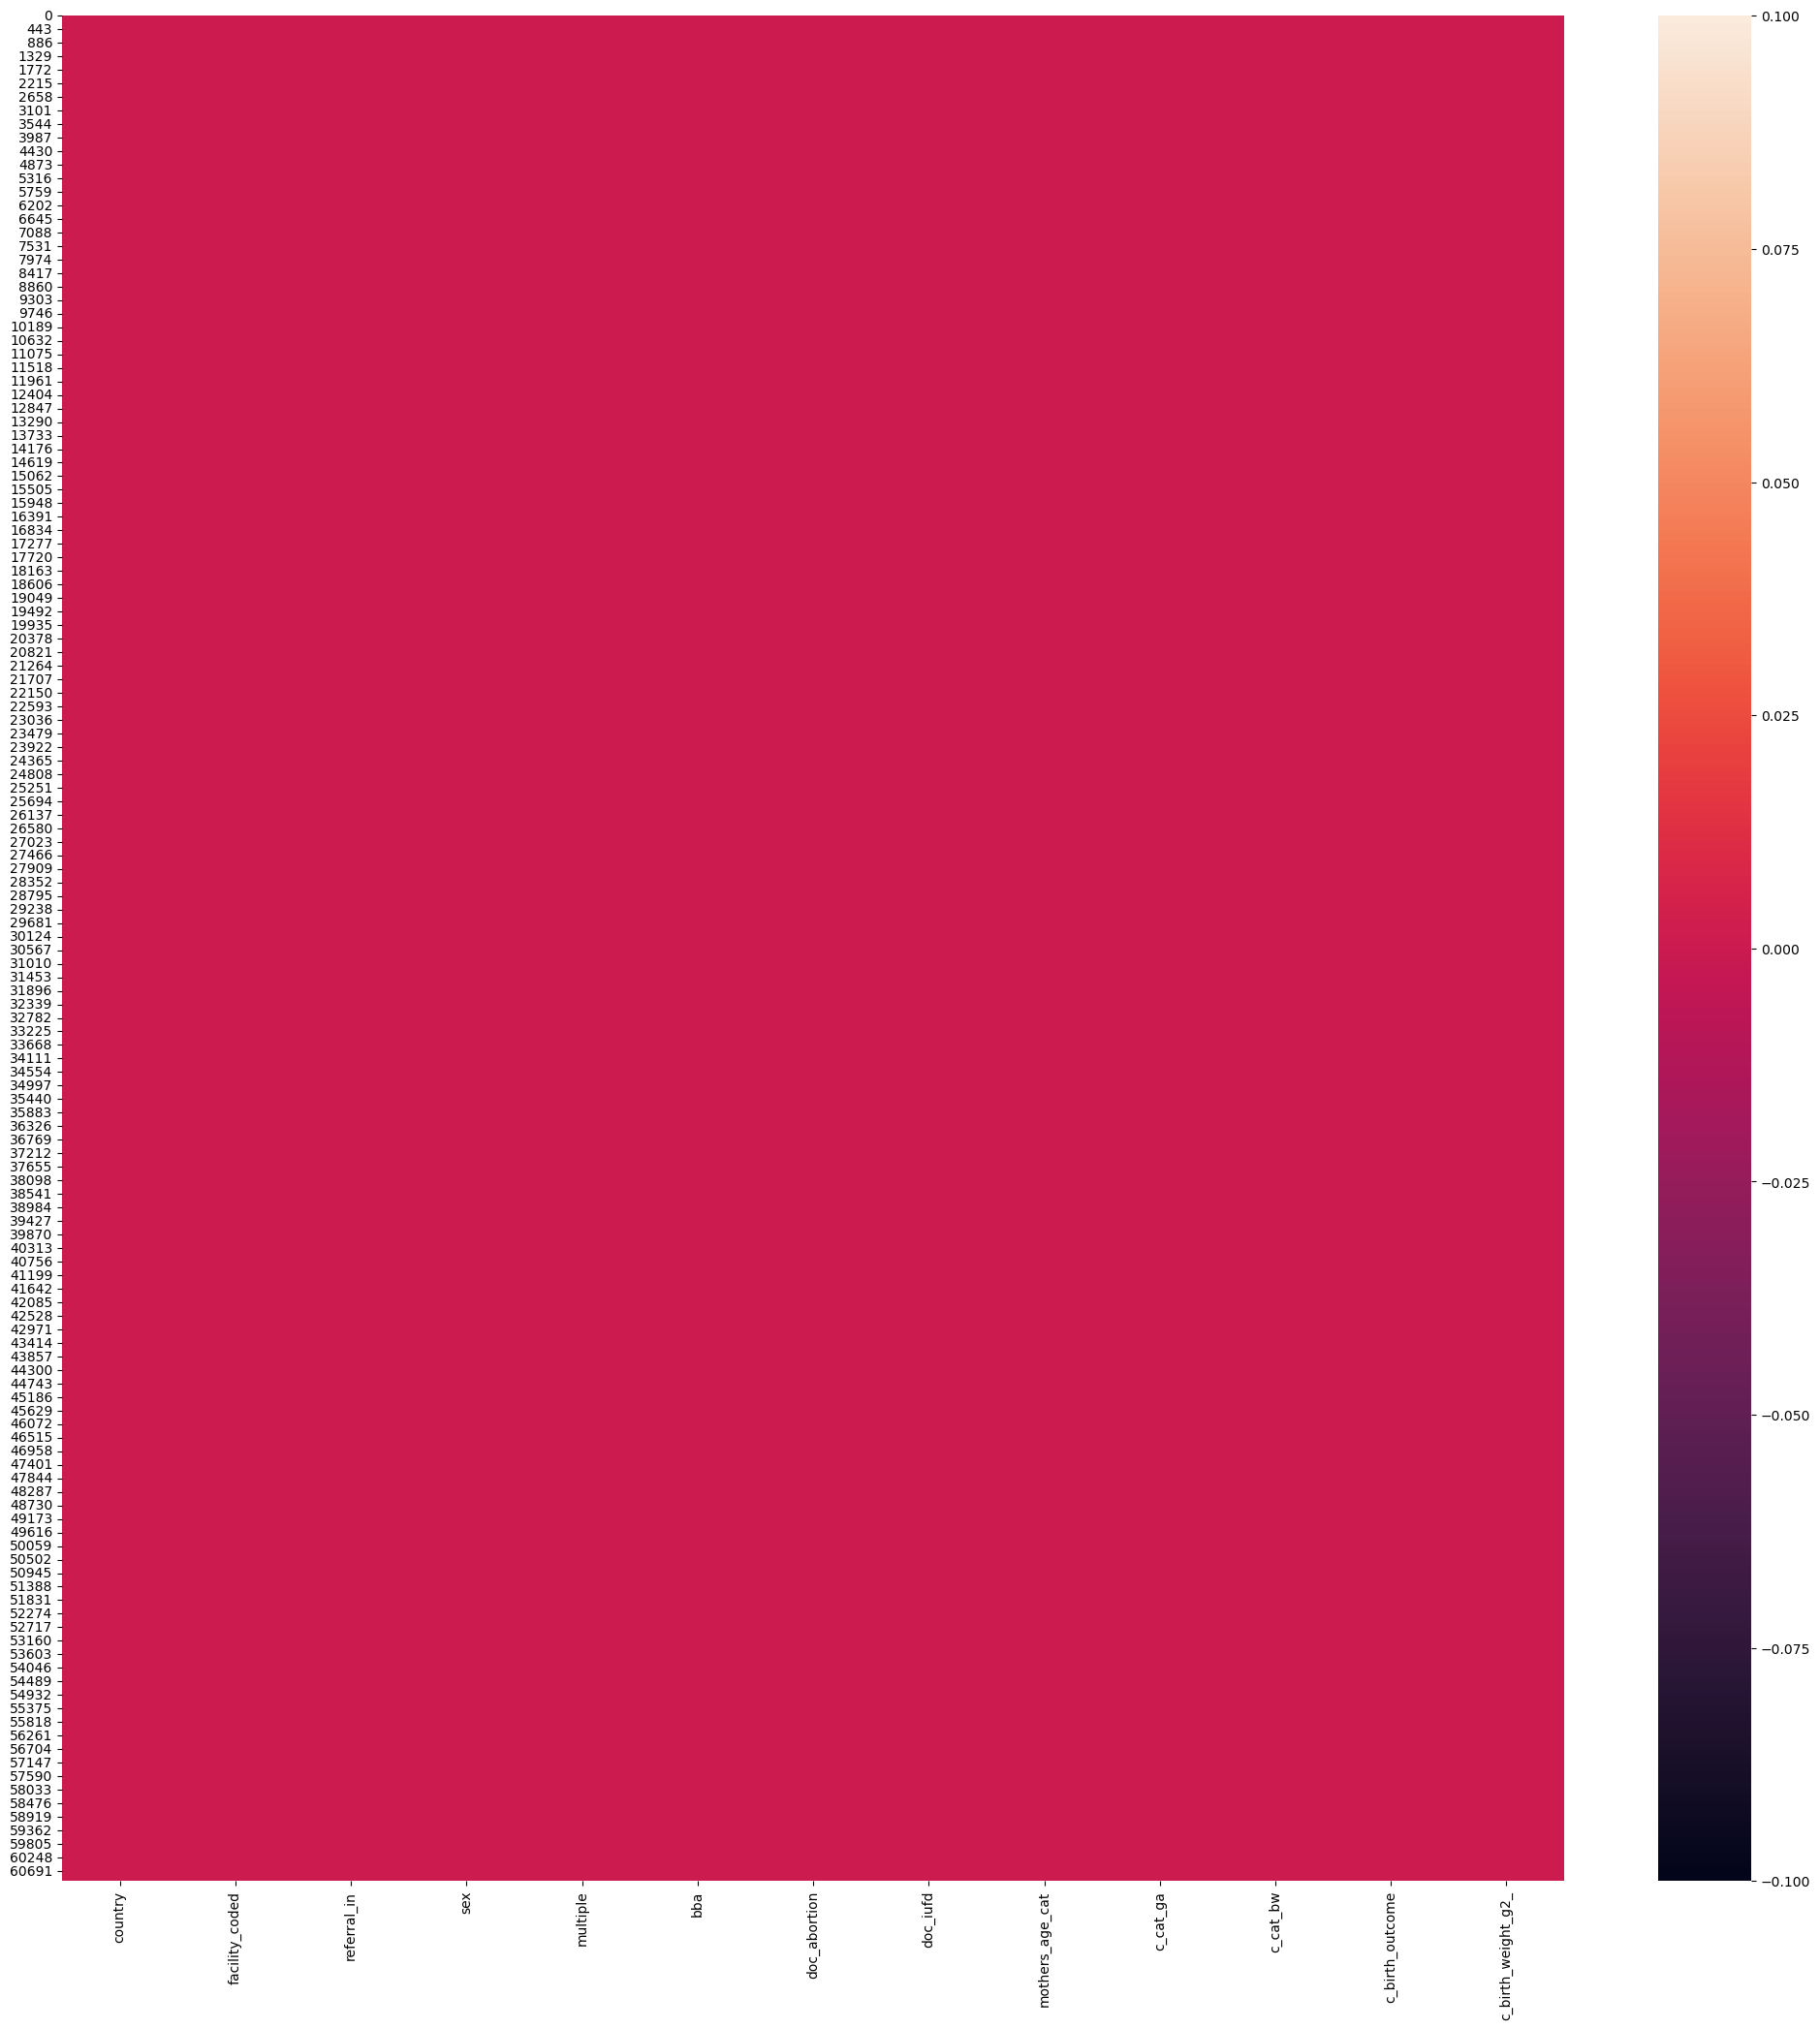

In [41]:
plt.figure(figsize=(25,25))
sns.heatmap(df_new.isnull())

In [42]:
df_new.shape

(61018, 13)

In [43]:
df_new.columns

Index(['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw',
       'c_birth_outcome', 'c_birth_weight_g2_'],
      dtype='object')

# Data visualization

### Counter Plot

In [44]:
df_new['doc_abortion'].value_counts()

doc_abortion
0    58449
1     2569
Name: count, dtype: int64

In [45]:
df_new['doc_abortion'].value_counts()

doc_abortion
0    58449
1     2569
Name: count, dtype: int64

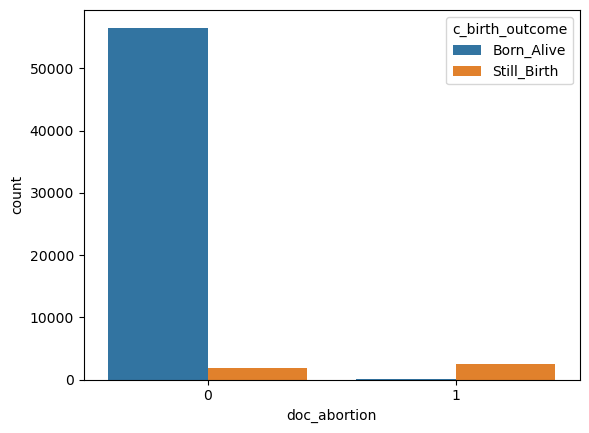

In [46]:
sns.countplot(x = 'doc_abortion', data = df_new,hue='c_birth_outcome');

#### Here mothers those who did abortion before have more numbers still birth then those who did not do any abortion

In [47]:
df_new['mothers_age_cat'].value_counts()

mothers_age_cat
20-24      20898
25-29      13915
≤19        12755
30-34       8187
≥35         4607
missing      656
Name: count, dtype: int64

In [48]:
df_new.groupby(['mothers_age_cat','c_birth_outcome'])['c_birth_outcome'].count()

mothers_age_cat  c_birth_outcome
20-24            Born_Alive         19622
                 Still_Birth         1276
25-29            Born_Alive         12913
                 Still_Birth         1002
30-34            Born_Alive          7456
                 Still_Birth          731
missing          Born_Alive           594
                 Still_Birth           62
≤19              Born_Alive         11945
                 Still_Birth          810
≥35              Born_Alive          4058
                 Still_Birth          549
Name: c_birth_outcome, dtype: int64

<Axes: xlabel='mothers_age_cat', ylabel='count'>

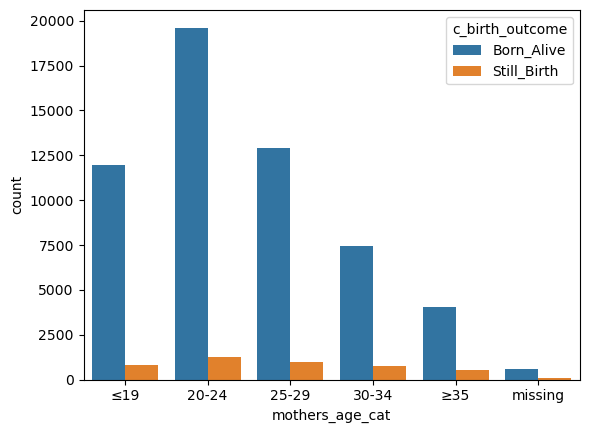

In [49]:
sns.countplot(x = 'mothers_age_cat', data = df_new,hue='c_birth_outcome')

Here we can see the possiblity of still birth occurs much for those mothers whose age are lies between 20 to 24

In [50]:
df_new.groupby(['doc_iufd','c_birth_outcome'])['c_birth_outcome'].count()

doc_iufd  c_birth_outcome
0         Born_Alive         56422
          Still_Birth         3926
1         Born_Alive           166
          Still_Birth          504
Name: c_birth_outcome, dtype: int64

<Axes: xlabel='doc_iufd', ylabel='count'>

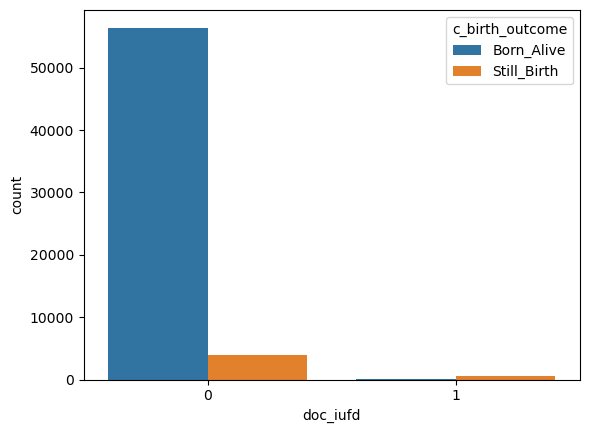

In [51]:
sns.countplot(x = 'doc_iufd', data = df_new,hue='c_birth_outcome')

#### intrauterine fetal death increases the possibility of baby's death after week 20

In [52]:
df_new.groupby(['c_cat_ga','c_birth_outcome'])['c_birth_outcome'].count()

c_cat_ga  c_birth_outcome
24-27wks  Born_Alive           533
          Still_Birth          204
28-30wks  Born_Alive          1258
          Still_Birth          203
31-33wks  Born_Alive          1192
          Still_Birth          127
34-36wks  Born_Alive          4708
          Still_Birth          246
37wks+    Born_Alive         47900
          Still_Birth         2561
<24wks    Born_Alive           997
          Still_Birth         1089
Name: c_birth_outcome, dtype: int64

<Axes: xlabel='c_cat_ga', ylabel='count'>

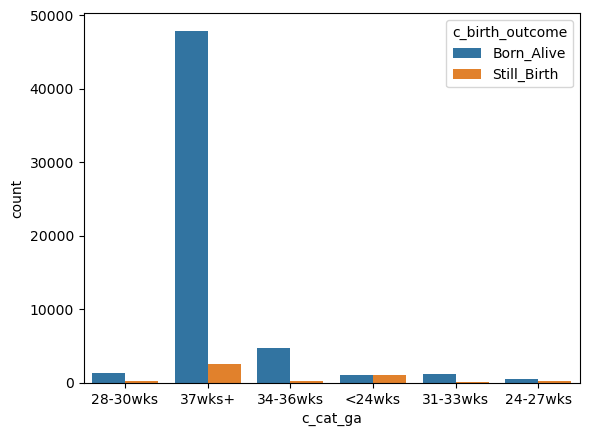

In [53]:
sns.countplot(x = 'c_cat_ga', data = df_new,hue='c_birth_outcome')

#### If gestational age  is below 24 week then we can find approximately 50 percent of still birth and gestational ages  between 24 to 27 weeks ,28 to 30 weeks,more then 37 weeks the still birth occur much.We can also see between 34 to 36 weeks and 31 to 33 weeks still birth occurs less numbers here birth alive possiblity is much higher

In [54]:
Q1 = df_new['c_birth_weight_g2_'].quantile(0.25)
Q3 = df_new['c_birth_weight_g2_'].quantile(0.75)

In [55]:
IQR = Q3-Q1

In [56]:
lower_limit = Q1 - IQR*1.5
upper_limit = Q3 + IQR*1.5

In [57]:
my_df_new = df_new[(df_new['c_birth_weight_g2_']>lower_limit)&(df_new['c_birth_weight_g2_']<upper_limit)]

In [58]:
my_df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0
5,1,HF008,Missing,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,3100.0


In [59]:
my_df_new.shape

(58732, 13)

<Axes: xlabel='sex', ylabel='c_birth_weight_g2_'>

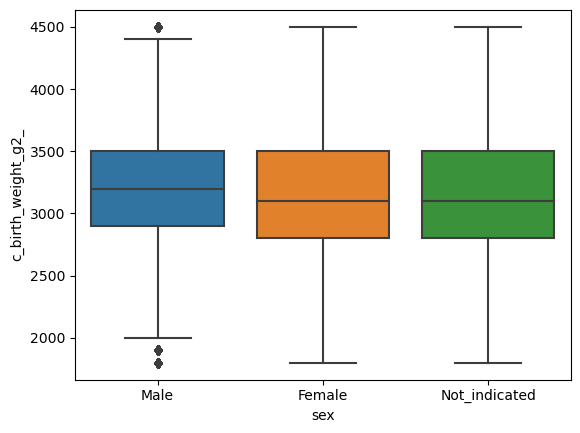

In [60]:
sns.boxplot(y='c_birth_weight_g2_', x='sex', data=my_df_new)

<Axes: xlabel='sex', ylabel='c_birth_weight_g2_'>

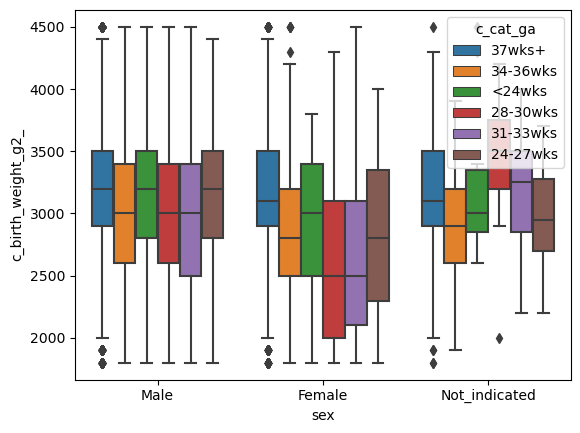

In [61]:
sns.boxplot(y='c_birth_weight_g2_', x='sex', hue='c_cat_ga', data=my_df_new)

In [62]:
my_df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0
5,1,HF008,Missing,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,3100.0


<Axes: xlabel='country', ylabel='c_birth_weight_g2_'>

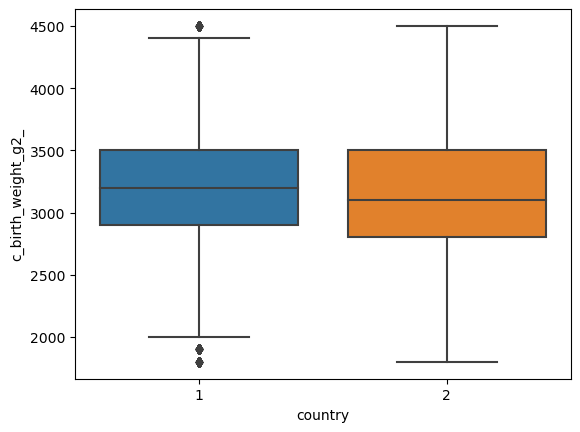

In [63]:
sns.boxplot(y='c_birth_weight_g2_', x='country', data=my_df_new)

<Axes: xlabel='sex', ylabel='c_birth_weight_g2_'>

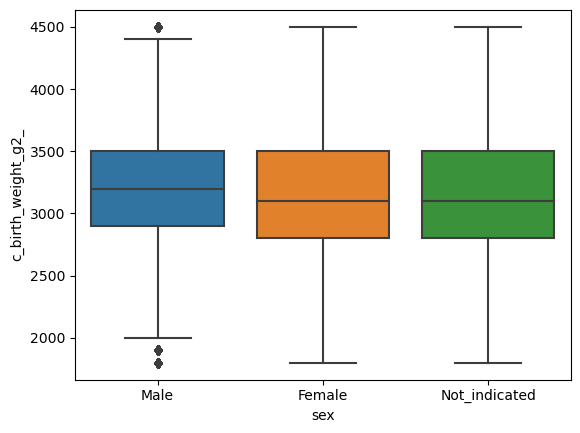

In [64]:
sns.boxplot(y='c_birth_weight_g2_', x='sex', data=my_df_new)

<Axes: xlabel='mothers_age_cat', ylabel='c_birth_weight_g2_'>

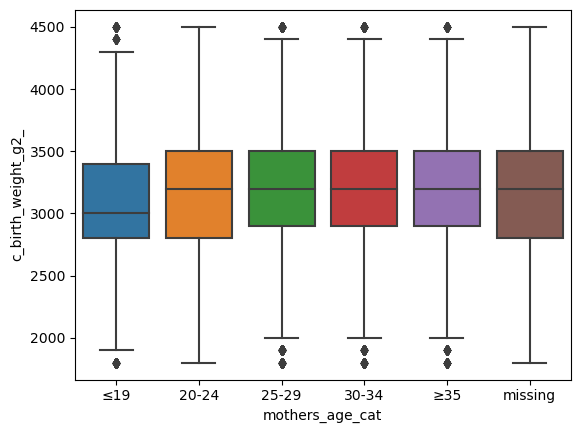

In [65]:
sns.boxplot(y='c_birth_weight_g2_', x='mothers_age_cat', data=my_df_new)

<Axes: xlabel='mothers_age_cat', ylabel='c_birth_weight_g2_'>

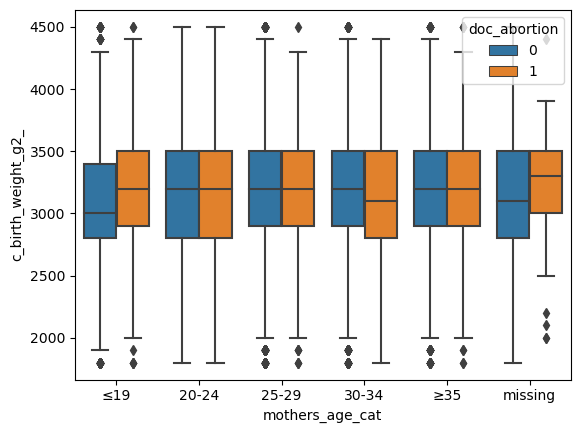

In [66]:
sns.boxplot(y='c_birth_weight_g2_', x='mothers_age_cat', hue='doc_abortion', data=my_df_new)

Mothers with age under 19 and did abortion before, have babies with higher birth weight mean than who did not do abortion before. Mothers who have age between 30 to 34 and did abortion before, have babies with higher birth weight mean than who did before.

<Axes: xlabel='doc_abortion', ylabel='c_birth_weight_g2_'>

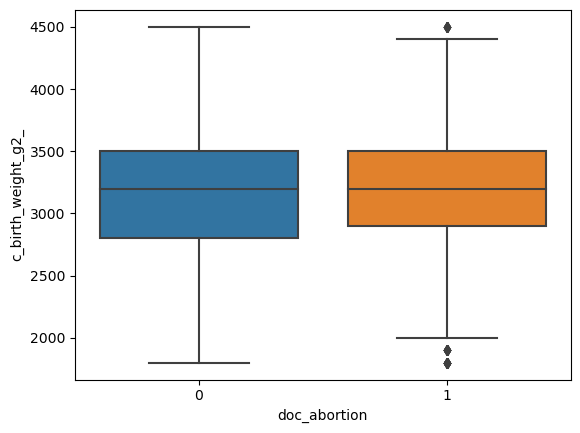

In [67]:
sns.boxplot(y='c_birth_weight_g2_', x='doc_abortion', data=my_df_new)

<Axes: xlabel='mothers_age_cat', ylabel='c_birth_weight_g2_'>

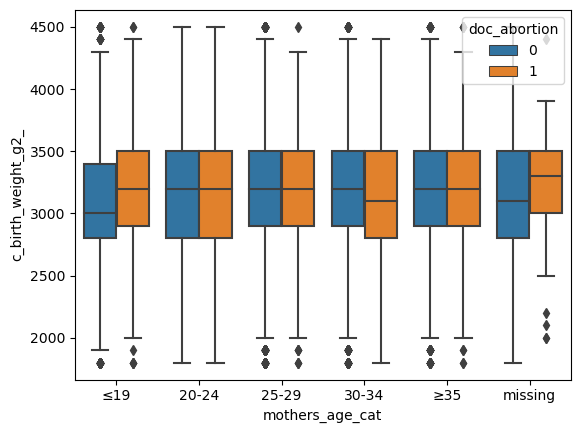

In [68]:
sns.boxplot(y='c_birth_weight_g2_', x='mothers_age_cat', hue='doc_abortion', data=my_df_new)

<Axes: xlabel='c_cat_ga', ylabel='c_birth_weight_g2_'>

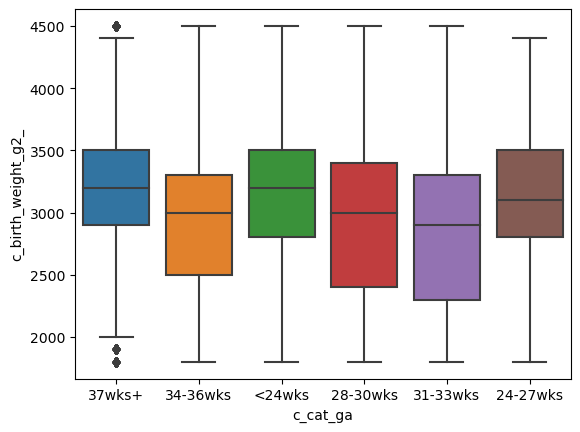

In [69]:
sns.boxplot(y='c_birth_weight_g2_', x='c_cat_ga', data=my_df_new)

<Axes: xlabel='bba', ylabel='c_birth_weight_g2_'>

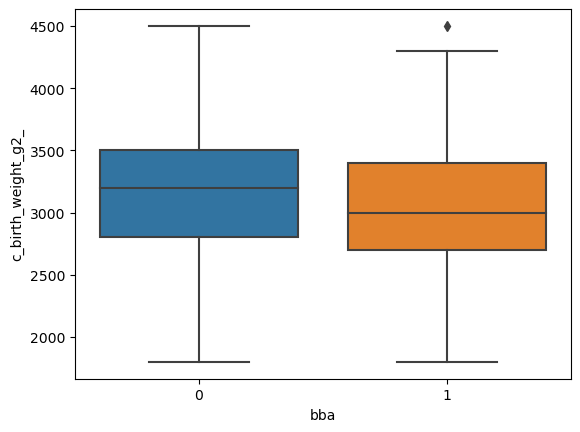

In [70]:
sns.boxplot(y='c_birth_weight_g2_', x='bba', data=my_df_new)

<Axes: xlabel='doc_iufd', ylabel='c_birth_weight_g2_'>

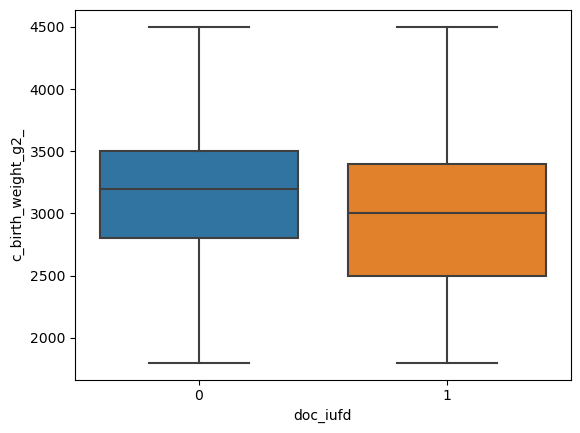

In [71]:
sns.boxplot(y='c_birth_weight_g2_', x='doc_iufd', data=my_df_new)

Babies who were born before arrival at the facility, has lower birth weight than babies who were born after arrival at the facility

<Axes: xlabel='c_birth_weight_g2_', ylabel='Count'>

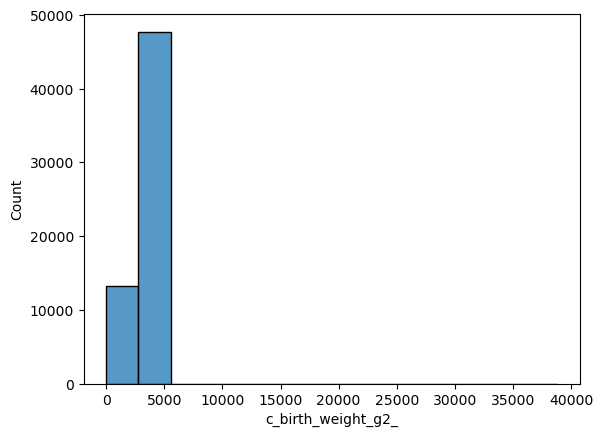

In [72]:
sns.histplot(x='c_birth_weight_g2_', data=df_new, bins=14)

<Axes: xlabel='c_birth_weight_g2_', ylabel='Count'>

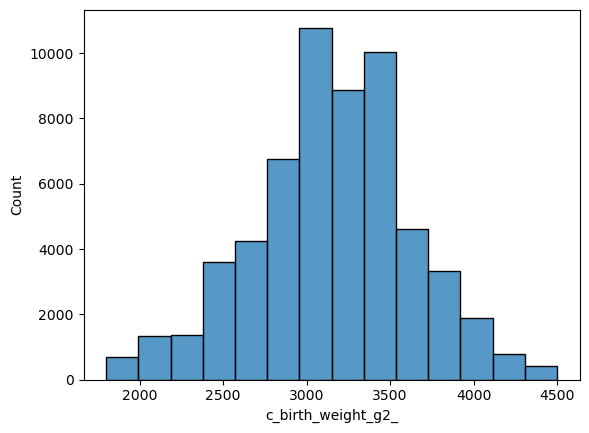

In [73]:
sns.histplot(x='c_birth_weight_g2_', data=my_df_new, bins=14)

<Axes: xlabel='c_birth_weight_g2_', ylabel='Count'>

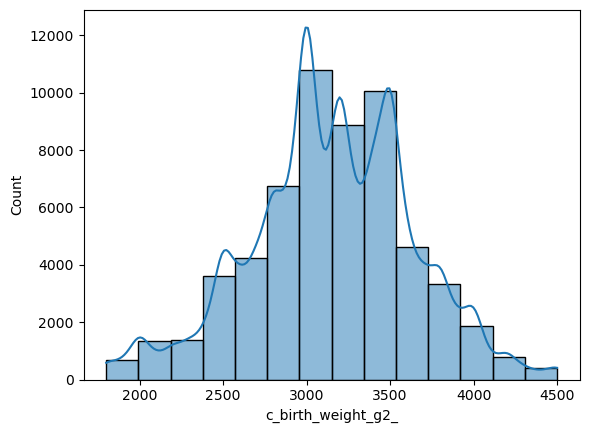

In [74]:
sns.histplot(x='c_birth_weight_g2_', data=my_df_new, bins=14, kde=True)

# Feature selection with pearson correlation

In [75]:
df_new.head(10)

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0
5,1,HF008,Missing,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,3100.0
6,2,HF0005,Missing,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,3900.0
7,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
8,2,HF0005,0,Male,1.0,0,1,0,≤19,<24wks,3000-3499g,Still_Birth,2500.0
9,2,HF0006,0,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,3600.0


In [76]:
df_new.shape

(61018, 13)

In [77]:
df_new.columns

Index(['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw',
       'c_birth_outcome', 'c_birth_weight_g2_'],
      dtype='object')

In [78]:
y = my_df_new['c_birth_outcome']
X = my_df_new.drop(columns = 'c_birth_outcome')

In [79]:
X.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_weight_g2_
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,2800.0
5,1,HF008,Missing,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,3100.0


In [80]:
y.head()

1    Born_Alive
2    Born_Alive
3    Born_Alive
4    Born_Alive
5    Born_Alive
Name: c_birth_outcome, dtype: object

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20,stratify = y)

In [82]:
%matplotlib inline

In [83]:
X_train.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_weight_g2_
3642,1,HF010,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3000.0
14166,2,HF0003,0,Male,1.0,0,0,0,20-24,<24wks,3000-3499g,2800.0
19937,2,HF0004,0,Male,1.0,0,0,0,20-24,37wks+,2500-2999g,2800.0
53613,1,HF009,Missing,Female,1.0,0,0,0,30-34,37wks+,2500-2999g,2800.0
40,1,HF021,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,2900.0


In [84]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

#  Separate the independent (X) and dependent (y) features

In [85]:
# Separate the independent (X) and dependent (y) features
y = df_new['c_birth_outcome']
X = df_new.drop(columns = 'c_birth_outcome')


In [86]:
X.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,2800.0


In [87]:
df_new.c_birth_outcome.value_counts() / len(df_new) * 100

c_birth_outcome
Born_Alive     92.739847
Still_Birth     7.260153
Name: count, dtype: float64

# Finding features with numeric values

In [88]:
numerical_features = [feature for feature in df_new.columns if df_new[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_new[numerical_features].head()

Number of numerical variables:  6


,country,multiple,bba,doc_abortion,doc_iufd,c_birth_weight_g2_
0,2,1.0,0,0,0,1400.0
1,2,1.0,0,0,0,3000.0
2,2,1.0,0,0,0,3600.0
3,1,1.0,0,0,0,3000.0
4,1,1.0,0,0,0,2800.0


In [89]:
df_new.columns

Index(['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw',
       'c_birth_outcome', 'c_birth_weight_g2_'],
      dtype='object')

# Making numeric representation of categorical variables

In [90]:
new_raw_data = pd.get_dummies(df_new, columns = ['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw'])
print(new_raw_data.shape)
new_raw_data.head()

(61018, 63)


,c_birth_outcome,c_birth_weight_g2_,country_1,country_2,facility_coded_HF0001,facility_coded_HF0002,facility_coded_HF0003,facility_coded_HF0004,facility_coded_HF0005,facility_coded_HF0006,...,c_cat_ga_37wks+,c_cat_ga_<24wks,c_cat_bw_1000-1499g,c_cat_bw_1500-1999g,c_cat_bw_2000-2499g,c_cat_bw_2500-2999g,c_cat_bw_3000-3499g,c_cat_bw_3500g+,c_cat_bw_500-999g,c_cat_bw_<500g
0,Born_Alive,1400.0,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,Born_Alive,3000.0,False,True,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,Born_Alive,3600.0,False,True,False,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
3,Born_Alive,3000.0,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,Born_Alive,2800.0,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


# Splitting the Raw Data - train-test validation

In [91]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [92]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [95]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [96]:
X = new_raw_data.drop(columns='c_birth_outcome').values  # Input features (attributes)
y = new_raw_data['c_birth_outcome'].values  # Target vector

In [97]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=42,stratify=y)

# KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [99]:
y_pred=classifier.predict(X_test)

In [100]:
accuracy_score(y_test,y_pred)

0.9648475909537857

# SVM

In [101]:
classifier=SVC()
classifier.fit(X_train,y_train)

SVC()

In [102]:
y_pred0=classifier.predict(X_test)

In [103]:
a1=accuracy_score(y_test,y_pred0)
a1

0.9274008521796132

In [104]:
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X shape: (61018, 62)
y shape: (61018,)


In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

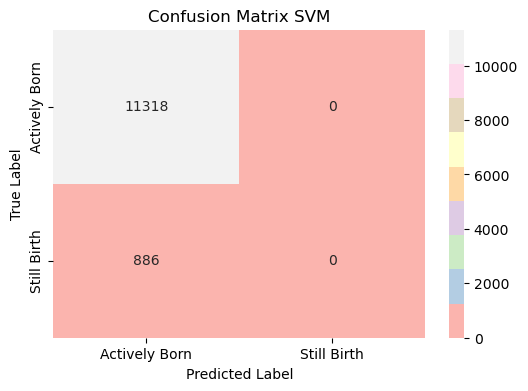

In [106]:
cm = confusion_matrix(y_test, y_pred0)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1',xticklabels=['Actively Born', 'Still Birth'], yticklabels=['Actively Born', 'Still Birth'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix SVM')
plt.show()

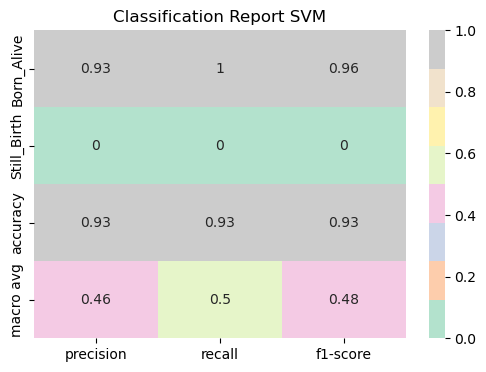

In [107]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred0, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(6, 4))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Pastel2')
plt.title('Classification Report SVM')
plt.show()

# RBF-SVM

In [108]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('svm', SVC(kernel='rbf'))
])

In [109]:
param_dist = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.0001, 0.001, 0.01, 0.1],
    'svm__degree': [1, 2, 3, 4],
    'svm__coef0': [0.0, 0.01, 0.05, 0.1]
}

In [110]:
n_iter_search = 20

In [111]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=n_iter_search, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

In [112]:
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)
#X_train_small, _, y_train_small, _ =train_test_split(X_train, y_train, train_size = 0.8, test_size=0.2, random_state=42)

In [113]:
random_search.fit(X_train_small, y_train_small)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA(n_components=10)),
                                             ('svm', SVC())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'svm__C': [0.1, 1, 10, 100],
                                        'svm__coef0': [0.0, 0.01, 0.05, 0.1],
                                        'svm__degree': [1, 2, 3, 4],
                                        'svm__gamma': [0.0001, 0.001, 0.01,
                                                       0.1]},
                   random_state=42, scoring='accuracy')

In [114]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation accuracy: {random_search.best_score_}")

Best parameters: {'svm__gamma': 0.001, 'svm__degree': 3, 'svm__coef0': 0.01, 'svm__C': 100}
Best cross-validation accuracy: 0.9722389052571495


In [115]:
best_model = random_search.best_estimator_
y_pred3 = best_model.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred3)
print(f"Test set accuracy: {accuracy2}")

Test set accuracy: 0.9754178957718781


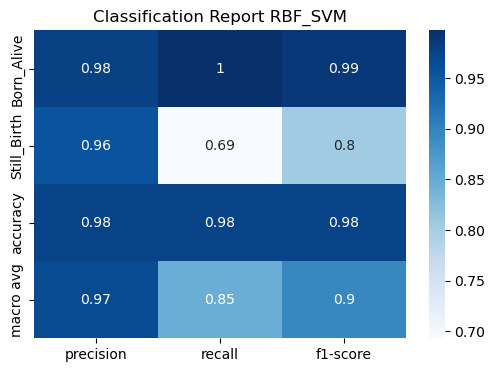

In [116]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred3, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(6, 4))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report RBF_SVM')
plt.show()

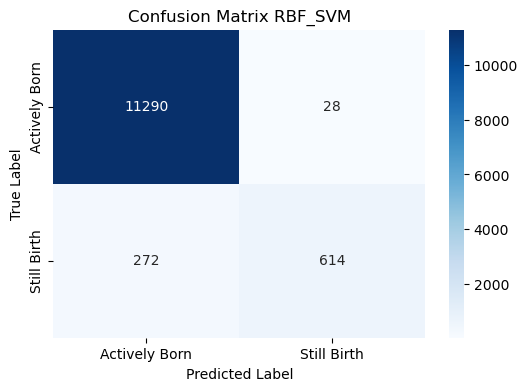

In [117]:
cm1 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',xticklabels=['Actively Born', 'Still Birth'], yticklabels=['Actively Born', 'Still Birth'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix RBF_SVM')
plt.show()

# NU-SVM

In [118]:
from sklearn.svm import NuSVC

In [119]:
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('svm', NuSVC())
])

In [120]:
param_grid = {
    'svm__nu': [0.01, 0.03, 0.05, 0.07, 0.09],
    'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'pca__n_components': [5, 10, 15]  # Example to also tune PCA n_components
}

In [121]:
random_search1 = RandomizedSearchCV(estimator=pipeline1, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

In [122]:
random_search1.fit(X_train_small, y_train_small)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA(n_components=10)),
                                             ('svm', NuSVC())]),
                   param_distributions={'pca__n_components': [5, 10, 15],
                                        'svm__gamma': ['scale', 'auto', 0.001,
                                                       0.01, 0.1, 1],
                                        'svm__kernel': ['linear', 'poly', 'rbf',
                                                        'sigmoid'],
                                        'svm__nu': [0.01, 0.03, 0.05, 0.07,
                                                    0.09]},
                   random_state=42)

In [123]:
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

In [124]:
print(f"Best parameters: {random_search1.best_params_}")
print(f"Best cross-validation accuracy: {random_search1.best_score_}")

Best parameters: {'svm__nu': 0.07, 'svm__kernel': 'poly', 'svm__gamma': 'scale', 'pca__n_components': 15}
Best cross-validation accuracy: 0.9718291216539499


In [125]:
best_model1 = random_search1.best_estimator_
y_pred1 = best_model1.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred1)
print(f"Test set accuracy: {accuracy3}")

Test set accuracy: 0.9750901343821697


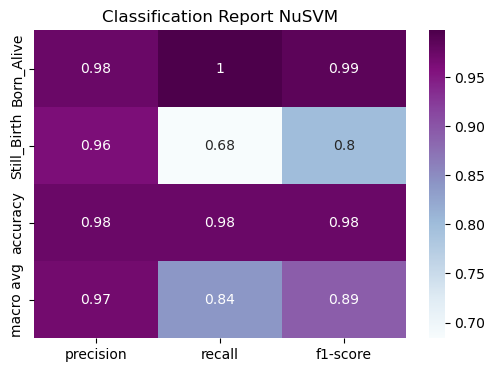

In [126]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred1, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(6, 4))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='BuPu')
plt.title('Classification Report NuSVM')
plt.show()

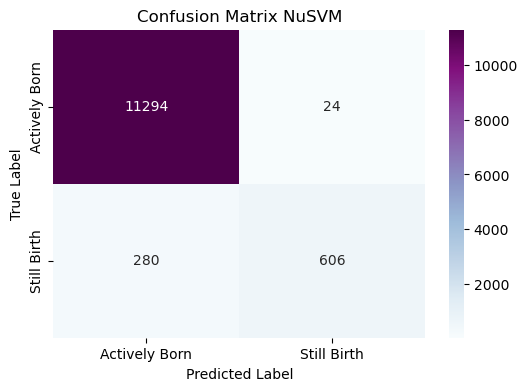

In [127]:
cm2 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='BuPu',xticklabels=['Actively Born', 'Still Birth'], yticklabels=['Actively Born', 'Still Birth'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix NuSVM')
plt.show()

# RBF-NU SVM

In [128]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', NuSVC(kernel='rbf'))  # Ensure RBF kernel is used
])

In [129]:
#param_grid = {
#    'svm__nu': [0.01, 0.03, 0.05, 0.07, 0.09],
#    'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
#    'pca__n_components': [5, 10, 15]  # Example to also tune PCA n_components
#}
param_grid = {
    'svm__nu': [0.01, 0.03, 0.05, 0.07, 0.09, 0.11],
    'svm__gamma': ['scale', 'auto',0.000001, 0.00001, 0.0001],
    'pca__n_components': [15, 20, 25],  # Example to also tune PCA n_components
    'svm__coef0': [0.0, 0.1, 0.5, 1.0],
    'svm__tol': [1e-1, 1e+0, 1e+1]
}

In [130]:
random_search2 = RandomizedSearchCV(estimator=pipeline2, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

In [131]:
random_search2.fit(X_train_small, y_train_small)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('svm', NuSVC())]),
                   param_distributions={'pca__n_components': [15, 20, 25],
                                        'svm__coef0': [0.0, 0.1, 0.5, 1.0],
                                        'svm__gamma': ['scale', 'auto', 1e-06,
                                                       1e-05, 0.0001],
                                        'svm__nu': [0.01, 0.03, 0.05, 0.07,
                                                    0.09, 0.11],
                                        'svm__tol': [0.1, 1.0, 10.0]},
                   random_state=42)

In [132]:
print(f"Best parameters: {random_search2.best_params_}")
print(f"Best cross-validation accuracy: {random_search2.best_score_}")

Best parameters: {'svm__tol': 0.1, 'svm__nu': 0.11, 'svm__gamma': 0.0001, 'svm__coef0': 0.0, 'pca__n_components': 15}
Best cross-validation accuracy: 0.9710096593722982


In [133]:
best_model2 = random_search2.best_estimator_
y_pred2 = best_model2.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred2)
print(f"Test set accuracy: {accuracy4}")

Test set accuracy: 0.9754178957718781


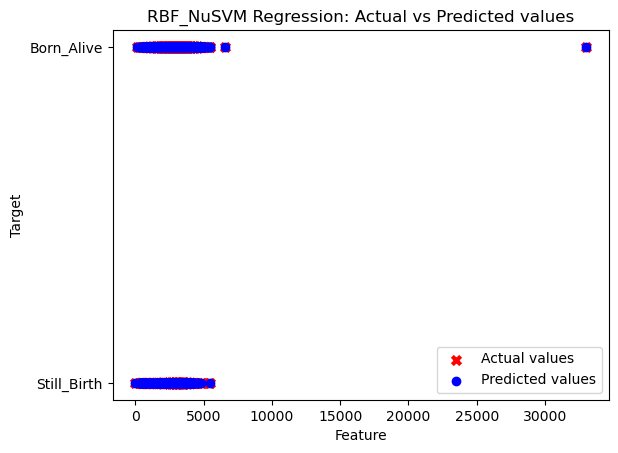

In [134]:
X_test_1d = X_test[:, 0]

# Sort the test set for a better plot
sorted_indices = np.argsort(X_test_1d)
X_test_sorted = X_test_1d[sorted_indices]
y_test_sorted = y_test[sorted_indices]
y_pred2_sorted = y_pred2[sorted_indices]

# Plotting the results
plt.scatter(X_test_sorted, y_test_sorted,marker='x', linewidth=3, color='red', label='Actual values')
plt.scatter(X_test_sorted, y_pred2_sorted, color='blue', linewidth=1, label='Predicted values')
plt.xticks()
plt.yticks()
plt.title("RBF_NuSVM Regression: Actual vs Predicted values")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

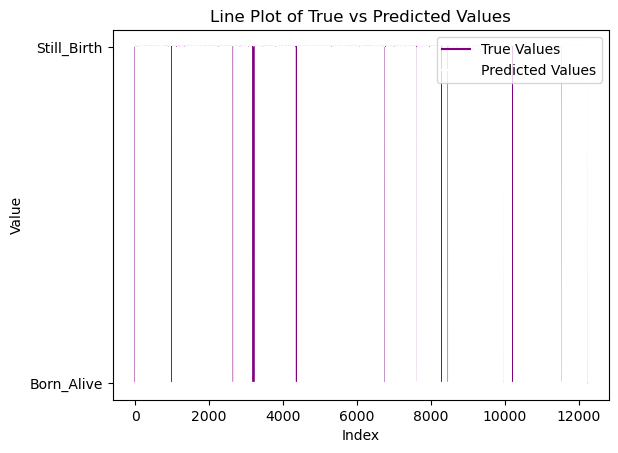

In [135]:
plt.plot(y_test,color='purple', label='True Values')
plt.plot(y_pred2,color='white', label='Predicted Values')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of True vs Predicted Values')
plt.legend(loc='upper right')

plt.show()

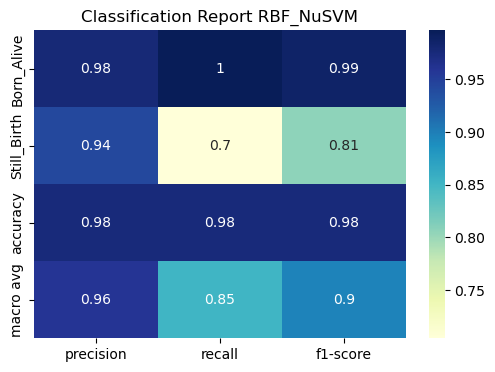

In [136]:
report = classification_report(y_test, y_pred2, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(6, 4))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report RBF_NuSVM')
plt.show()

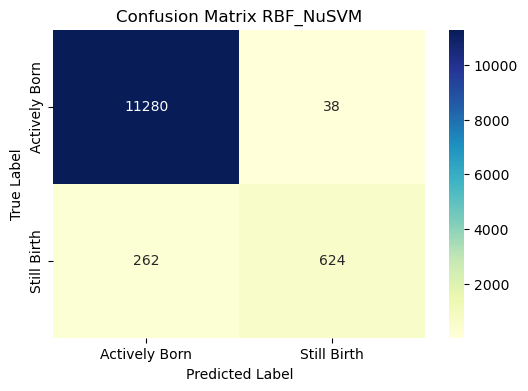

In [137]:
cm3 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='YlGnBu',xticklabels=['Actively Born', 'Still Birth'], yticklabels=['Actively Born', 'Still Birth'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix RBF_NuSVM')
plt.show()

# Comparing all the algorithms accuracies

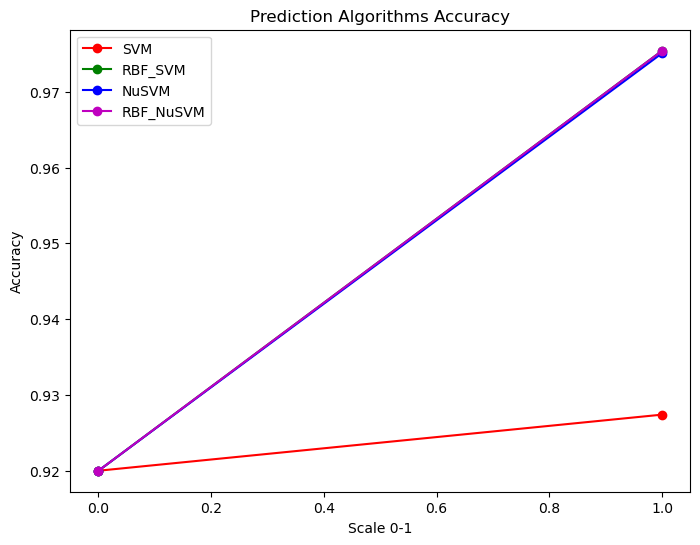

In [138]:
accuracies=[a1,accuracy2,accuracy3,accuracy4]
algorithms=["SVM","RBF_SVM","NuSVM","RBF_NuSVM"]
plt.figure(figsize=(8,6))
colors=['r','g','b','m']
for i,(accu,algo,c) in enumerate(zip(accuracies,algorithms,colors)):
    plt.plot([0,1],[0.92,accu],marker='o',linestyle='-',color=c,label=algo)
plt.title('Prediction Algorithms Accuracy')
plt.xlabel('Scale 0-1')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

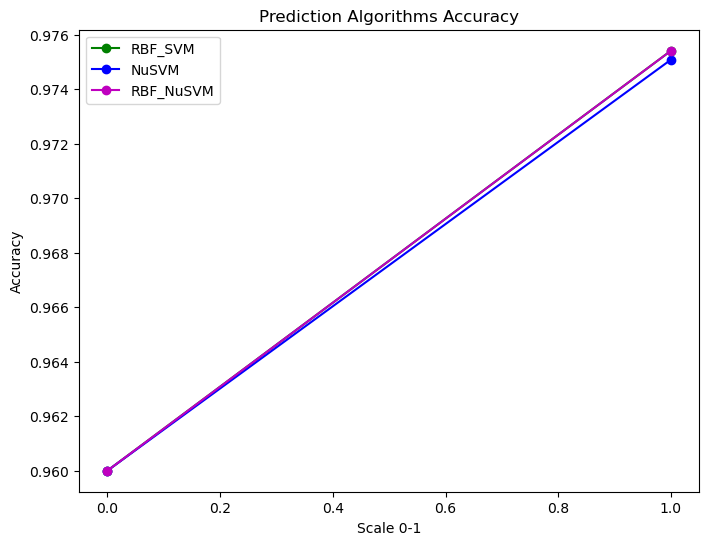

In [139]:
accuracies=[accuracy2,accuracy3,accuracy4]
algorithms=["RBF_SVM","NuSVM","RBF_NuSVM"]
plt.figure(figsize=(8,6))
colors=['g','b','m']
for i,(accu,algo,c) in enumerate(zip(accuracies,algorithms,colors)):
    plt.plot([0,1],[0.96,accu],marker='o',linestyle='-',color=c,label=algo)
plt.title('Prediction Algorithms Accuracy')
plt.xlabel('Scale 0-1')
plt.ylabel('Accuracy')
plt.legend()
plt.show()